In [1]:
import yfinance as yf
import numpy as np
import pandas as pd


# Download historical data for Nifty 50 from Yahoo Finance
nifty_data = yf.download('^NSEBANK', start='2003-01-01', end='2025-01-01')


# Define the list of stocks to download
stocks = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'AXISBANK.NS', 'INDUSINDBK.NS']

# Loop through each stock and download its data
for stock in stocks:
    stock_data = yf.download(stock, start='2010-01-01', end='2025-03-22')
    
    # Extract the 'Close' column and rename it to include the stock name for clarity
    close_column_name = stock.replace('.NS', '').lower() + '_close'
    nifty_data[close_column_name] = stock_data['Close']

# Now, nifty_data contains additional columns for the closing prices of each stock

# Apply feature engineering on nifty_data as needed
# Placeholder for actual feature engineering code

# Save the combined data to a CSV file
nifty_data.to_csv('nifty_with_stocks_data.csv')

# Print the first few rows to verify
print(nifty_data.head())


# Save the data to a CSV file
nifty_data.to_csv('nifty50_historical_data.csv')

# Print the first few rows of the data
nifty_data.describe


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-09-17  6898.000000  6977.200195  6843.000000  6897.100098  6897.020020   
2007-09-18  6921.149902  7078.950195  6883.600098  7059.649902  7059.567871   
2007-09-19  7111.000000  7419.350098  7111.000000  7401.850098  7401.764160   
2007-09-20  7404.950195  7462.899902  7343.600098  7390.149902  7390.063965   
2007-09-21  7378.299805  7506.350098  7367.

<bound method NDFrame.describe of                     Open          High           Low         Close  \
Date                                                                 
2007-09-17   6898.000000   6977.200195   6843.000000   6897.100098   
2007-09-18   6921.149902   7078.950195   6883.600098   7059.649902   
2007-09-19   7111.000000   7419.350098   7111.000000   7401.850098   
2007-09-20   7404.950195   7462.899902   7343.600098   7390.149902   
2007-09-21   7378.299805   7506.350098   7367.149902   7464.500000   
...                  ...           ...           ...           ...   
2024-03-27  46643.449219  46956.101562  46643.449219  46785.949219   
2024-03-28  46827.851562  47440.449219  46827.851562  47124.601562   
2024-04-01  47391.050781  47646.800781  47373.101562  47578.250000   
2024-04-02  47490.750000  47707.351562  47408.550781  47545.449219   
2024-04-03  47350.250000  47451.500000  47279.800781  47417.550781   

               Adj Close     Volume  hdfcbank_close  ic

In [2]:
# Calculate daily returns
nifty_data['daily_returns'] = nifty_data['Close'].pct_change()*100

mean_return = nifty_data['daily_returns'].mean()
p=mean_return*10

#Define the conditions and apply them to create 'expected_returns'
conditions = [
    (nifty_data['daily_returns'] >= p),
    (nifty_data['daily_returns'] <= -1*p),
    (np.abs(nifty_data['daily_returns']) -1*p< p)
]

choices = [1, -1, 0]

nifty_data['expected_returns'] = np.select(conditions, choices, default=0)

# Drop NaN values introduced by the calculation
nifty_data = nifty_data.dropna()

nifty_data.tail(5)
print(mean_return)

nifty_data['expected_returns'].value_counts()

0.06864146548313799


expected_returns
 0    1514
 1     907
-1     803
Name: count, dtype: int64

In [3]:
import numpy as np

# Assuming 'nifty_data' already contains the closing prices for each stock as added previously

# List of the stock tickers added to 'nifty_data' (without the '.NS' suffix and in lowercase)
stocks = ['hdfcbank', 'icicibank', 'kotakbank', 'sbin', 'axisbank', 'indusindbk']

for stock in stocks:
    # Calculate daily returns for each stock
    close_column = f'{stock}_close'
    daily_return_column = f'{stock}_daily_returns'
    nifty_data[daily_return_column] = nifty_data[close_column].pct_change() * 100

    # Calculate the mean return for each stock
    mean_return = nifty_data[daily_return_column].mean()
    p = mean_return * 10

    # Define conditions for expected returns based on each stock's daily returns
    conditions = [
        (nifty_data[daily_return_column] >= p),
        (nifty_data[daily_return_column] <= -1 * p),
        (np.abs(nifty_data[daily_return_column]) < p)
    ]
    choices = [1, -1, 0]

    # Create a new column for expected returns for each stock
    expected_return_column = f'{stock}_expected_returns'
    nifty_data[expected_return_column] = np.select(conditions, choices, default=0)

# Drop NaN values introduced by the calculation (if not done already)
nifty_data = nifty_data.dropna()

# Example to check the result for one of the stocks
print(nifty_data[[f'{stocks[0]}_daily_returns', f'{stocks[0]}_expected_returns']].tail(5))

# To get the mean return for a specific stock, e.g., HDFCBANK
mean_return_hdfcbank = nifty_data['hdfcbank_daily_returns'].mean()
print(mean_return_hdfcbank)

# To check value counts for expected returns for a specific stock, e.g., HDFCBANK
print(nifty_data['hdfcbank_expected_returns'].value_counts())
nifty_data.head(10)

            hdfcbank_daily_returns  hdfcbank_expected_returns
Date                                                         
2024-03-27                1.073378                          1
2024-03-28                0.499762                          0
2024-04-01                1.560880                          1
2024-04-02                0.656241                          0
2024-04-03                0.337804                          0
0.07930188823933358
hdfcbank_expected_returns
 0    1666
 1     818
-1     739
Name: count, dtype: int64


C:\Users\HI\AppData\Local\Temp\ipykernel_6952\3714687066.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data[daily_return_column] = nifty_data[close_column].pct_change() * 100
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\3714687066.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_data[expected_return_column] = np.select(conditions, choices, default=0)
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\3714687066.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,icicibank_daily_returns,icicibank_expected_returns,kotakbank_daily_returns,kotakbank_expected_returns,sbin_daily_returns,sbin_expected_returns,axisbank_daily_returns,axisbank_expected_returns,indusindbk_daily_returns,indusindbk_expected_returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,9191.250000,9214.000000,9157.349609,9192.150391,9192.043945,0,170.720001,161.463638,207.762497,229.205002,...,0.949191,1,0.990395,1,0.037101,0,2.086483,1,-0.105012,0
2010-01-06,9243.900391,9265.549805,9183.650391,9223.000000,9222.892578,0,170.835007,162.699997,210.287506,230.580002,...,0.765720,0,1.215334,1,0.599900,0,-1.678512,-1,2.382627,1
2010-01-07,9240.250000,9261.849609,9153.250000,9192.950195,9192.843750,0,171.279999,161.163635,212.649994,229.289993,...,-0.944291,-1,1.123456,1,-0.559462,0,0.707975,0,-2.258729,-1
2010-01-08,9185.049805,9214.349609,9141.450195,9160.700195,9160.593750,0,171.505005,158.899994,211.337494,228.604996,...,-1.404561,-1,-0.617211,0,-0.298747,0,1.306275,1,-0.350140,0
2010-01-11,9209.150391,9248.000000,9161.049805,9173.549805,9173.443359,0,170.815002,158.072723,212.149994,226.720001,...,-0.520623,0,0.384456,0,-0.824564,-1,3.292486,1,0.140546,0
2010-01-12,9173.849609,9173.849609,8973.049805,8985.099609,8984.995117,0,169.520004,153.227264,205.762497,220.320007,...,-3.065335,-1,-3.010840,-1,-2.822863,-1,-0.009531,0,-1.789476,-1
2010-01-13,8912.599609,8937.849609,8836.700195,8926.099609,8925.996094,0,168.929993,152.845459,203.250000,217.589996,...,-0.249176,0,-1.221067,-1,-1.239112,-1,-0.857716,-1,-1.964988,-1
2010-01-14,8952.000000,9040.000000,8883.099609,8910.799805,8910.696289,0,168.380005,151.872726,206.100006,215.735001,...,-0.636416,0,1.402217,1,-0.852519,-1,2.480056,1,0.291552,0
2010-01-15,8961.650391,8982.549805,8874.799805,8911.099609,8910.996094,0,169.414993,153.172729,205.475006,214.335007,...,0.855982,1,-0.303251,0,-0.648941,-1,1.097456,1,3.015984,1


In [4]:
def calculate_additional_features(data):
    # Relative Strength Index (RSI)
    period = 14
    data['rsi'] = 100 - (100 / (1 + data['daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
                                  data['daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x < 0].mean(), raw=True)))

    # Bollinger Bands
    window = 20
    data['ma'] = data['Close'].rolling(window=window).mean()
    data['std'] = data['Close'].rolling(window=window).std()
    data['upper_band'] = data['ma'] + (2 * data['std'])
    data['lower_band'] = data['ma'] - (2 * data['std'])

    # Moving Averages (5, 20, 50, 100)
    data['ma_5'] = data['Close'].rolling(window=5).mean()
    data['ma_20'] = data['Close'].rolling(window=20).mean()
    data['ma_50'] = data['Close'].rolling(window=50).mean()
    data['ma_100'] = data['Close'].rolling(window=100).mean()

    # Two Volume-based Indicators
    data['volume_ma_5'] = data['Volume'].rolling(window=5).mean()
    data['volume_ma_20'] = data['Volume'].rolling(window=20).mean()

    # Percentage Change for Last 1, 3, 5 Days
    data['pct_change_1d'] = data['Close'].pct_change(1)
    data['pct_change_3d'] = data['Close'].pct_change(3)
    data['pct_change_5d'] = data['Close'].pct_change(5)

    # High and Low Prices for Last 1, 3, 5, 8, 13, 21 Days
    periods = [1, 3, 5, 8, 13, 21]
    for period in periods:
        data[f'high_{period}d'] = data['High'].rolling(window=period).max()
        data[f'low_{period}d'] = data['Low'].rolling(window=period).min()

    # Peaks and Troughs
    data['peak'] = (data['Close'] > data['Close'].shift(1)) & (data['Close'] > data['Close'].shift(-1))
    data['trough'] = (data['Close'] < data['Close'].shift(1)) & (data['Close'] < data['Close'].shift(-1))

    return data.dropna()

# Apply the function to the existing DataFrame
nifty_data = calculate_additional_features(nifty_data)

nifty_data


C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2115221231.py:5: RuntimeWarning: Mean of empty slice.
  data['daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x < 0].mean(), raw=True)))


,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,high_5d,low_5d,high_8d,low_8d,high_13d,low_13d,high_21d,low_21d,peak,trough
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-01,9331.849609,9334.299805,9093.150391,9119.049805,9118.943359,0,185.509995,152.354553,188.899994,220.964996,...,9385.299805,8911.400391,9524.500000,8806.650391,9762.150391,8806.650391,9849.049805,8806.650391,False,True
2010-06-02,9164.049805,9220.200195,9083.650391,9192.450195,9192.343750,0,185.304993,153.145447,188.587494,225.824997,...,9385.299805,8954.349609,9524.500000,8806.650391,9572.049805,8806.650391,9849.049805,8806.650391,False,False
2010-06-03,9290.349609,9404.099609,9288.500000,9387.700195,9387.590820,0,190.559998,155.290909,189.887497,228.729996,...,9404.099609,9083.650391,9404.099609,8806.650391,9572.049805,8806.650391,9849.049805,8806.650391,False,False
2010-06-04,9402.799805,9490.950195,9363.299805,9455.950195,9455.839844,0,188.570007,157.427277,188.037506,234.074997,...,9490.950195,9083.650391,9490.950195,8911.400391,9524.500000,8806.650391,9849.049805,8806.650391,True,False
2010-06-07,9221.799805,9328.150391,9192.700195,9292.599609,9292.491211,0,187.664993,153.081818,188.600006,228.675003,...,9490.950195,9083.650391,9490.950195,8954.349609,9524.500000,8806.650391,9849.049805,8806.650391,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46990.250000,45828.800781,46990.250000,45828.800781,48071.699219,45828.800781,48161.250000,45661.750000,False,False
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,47440.449219,46529.050781,47440.449219,45828.800781,47853.800781,45828.800781,48161.250000,45661.750000,False,False
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,47646.800781,46529.050781,47646.800781,45828.800781,47812.750000,45828.800781,48161.250000,45661.750000,True,False


In [5]:
def calculate_additional_features(data, stocks):
    for stock in stocks:
        # Define the close column for the current stock
        close_col = f'{stock}_close'
        
        # Relative Strength Index (RSI) for the stock
        period = 14
        data[f'{stock}_rsi'] = 100 - (100 / (1 + data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
                                    data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x < 0].mean(), raw=True)))

        # Bollinger Bands for the stock
        window = 20
        data[f'{stock}_ma'] = data[close_col].rolling(window=window).mean()
        std = data[close_col].rolling(window=window).std()
        data[f'{stock}_upper_band'] = data[f'{stock}_ma'] + (2 * std)
        data[f'{stock}_lower_band'] = data[f'{stock}_ma'] - (2 * std)

        # Moving Averages for the stock
        for ma in [5, 20, 50, 100]:
            data[f'{stock}_ma_{ma}'] = data[close_col].rolling(window=ma).mean()

        # Volume-based Indicators - Adjust if volume data for each stock is available
        # If stock-specific volume data isn't available, consider removing these lines or adjust accordingly
        # data[f'{stock}_volume_ma_5'] = data['Volume'].rolling(window=5).mean()
        # data[f'{stock}_volume_ma_20'] = data['Volume'].rolling(window=20).mean()

        # Percentage Change for Last 1, 3, 5 Days for the stock
        data[f'{stock}_pct_change_1d'] = data[close_col].pct_change(1)
        data[f'{stock}_pct_change_3d'] = data[close_col].pct_change(3)
        data[f'{stock}_pct_change_5d'] = data[close_col].pct_change(5)

        # High and Low Prices for Last 1, 3, 5, 8, 13, 21 Days for the stock
        # Adjust if high/low data for each stock is available or use nifty_data's High/Low as approximation
        periods = [1, 3, 5, 8, 13, 21]
        for period in periods:
            data[f'{stock}_high_{period}d'] = data['High'].rolling(window=period).max() # Adjust if stock-specific High data available
            data[f'{stock}_low_{period}d'] = data['Low'].rolling(window=period).min() # Adjust if stock-specific Low data available

        # Peaks and Troughs for the stock - Adjust if needed based on stock-specific Close data
        data[f'{stock}_peak'] = (data[close_col] > data[close_col].shift(1)) & (data[close_col] > data[close_col].shift(-1))
        data[f'{stock}_trough'] = (data[close_col] < data[close_col].shift(1)) & (data[close_col] < data[close_col].shift(-1))

    return data.dropna()

# Define the list of stocks (based on the columns you've added to `nifty_data` for closing prices)
stocks = ['hdfcbank', 'icicibank', 'kotakbank', 'sbin', 'axisbank', 'indusindbk']

# Apply the function to the existing DataFrame
nifty_data = calculate_additional_features(nifty_data, stocks)

nifty_data


C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:8: RuntimeWarning: Mean of empty slice.
  data[f'{stock}_rsi'] = 100 - (100 / (1 + data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:8: RuntimeWarning: Mean of empty slice.
  data[f'{stock}_rsi'] = 100 - (100 / (1 + data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:8: RuntimeWarning: Mean of empty slice.
  data[f'{stock}_rsi'] = 100 - (100 / (1 + data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_rsi'] = 100 - (100 / (1 + data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_ma'] = data[close_col].rolling(window=window).mean()
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:15: PerformanceWarning: DataFram

C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_rsi'] = 100 - (100 / (1 + data[f'{stock}_daily_returns'].rolling(window=period, min_periods=1).apply(lambda x: x[x > 0].mean(), raw=True) /
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{stock}_ma'] = data[close_col].rolling(window=window).mean()
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\2945178938.py:15: PerformanceWarning: DataFram

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,indusindbk_high_5d,indusindbk_low_5d,indusindbk_high_8d,indusindbk_low_8d,indusindbk_high_13d,indusindbk_low_13d,indusindbk_high_21d,indusindbk_low_21d,indusindbk_peak,indusindbk_trough
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-19,12415.000000,12535.849609,12212.349609,12245.650391,12245.507812,0,236.884995,203.554550,252.475006,311.660004,...,12827.349609,12149.549805,12827.349609,12149.549805,12827.349609,12149.549805,12827.349609,12068.400391,True,False
2010-10-20,12214.750000,12302.700195,12139.900391,12176.500000,12176.358398,0,233.554993,202.527267,250.800003,309.434998,...,12827.349609,12139.900391,12827.349609,12139.900391,12827.349609,12139.900391,12827.349609,12068.400391,False,True
2010-10-21,12219.000000,12458.150391,12190.500000,12435.799805,12435.655273,0,236.509995,205.381821,251.500000,319.510010,...,12629.450195,12139.900391,12827.349609,12139.900391,12827.349609,12139.900391,12827.349609,12068.400391,False,False
2010-10-22,12480.200195,12486.549805,12298.150391,12384.799805,12384.656250,0,232.664993,205.790909,247.225006,320.619995,...,12535.849609,12139.900391,12827.349609,12139.900391,12827.349609,12139.900391,12827.349609,12068.400391,False,False
2010-10-25,12423.349609,12580.500000,12397.400391,12424.700195,12424.555664,0,230.470001,207.654541,251.024994,323.920013,...,12580.500000,12139.900391,12827.349609,12139.900391,12827.349609,12139.900391,12827.349609,12139.900391,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46990.250000,45828.800781,46990.250000,45828.800781,48071.699219,45828.800781,48161.250000,45661.750000,False,False
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,47440.449219,46529.050781,47440.449219,45828.800781,47853.800781,45828.800781,48161.250000,45661.750000,True,False
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,47646.800781,46529.050781,47646.800781,45828.800781,47812.750000,45828.800781,48161.250000,45661.750000,False,True


In [6]:
def calculate_additional_features(data):
    # ... (previous code)

    # Extract additional time-based features
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['week'] = data.index.isocalendar().week  # Corrected line
    data['year'] = data.index.year
    data['quarter'] = data.index.quarter
    data['weekday'] = data.index.dayofweek  # Day of the week (0 = Monday, 6 = Sunday)


    return data.dropna()

# Apply the function to the existing DataFrame
nifty_data = calculate_additional_features(nifty_data)
nifty_data


C:\Users\HI\AppData\Local\Temp\ipykernel_6952\3268119326.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['day'] = data.index.day
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\3268119326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data.index.day
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\3268119326.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,indusindbk_high_21d,indusindbk_low_21d,indusindbk_peak,indusindbk_trough,day,month,week,year,quarter,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-19,12415.000000,12535.849609,12212.349609,12245.650391,12245.507812,0,236.884995,203.554550,252.475006,311.660004,...,12827.349609,12068.400391,True,False,19,10,42,2010,4,1
2010-10-20,12214.750000,12302.700195,12139.900391,12176.500000,12176.358398,0,233.554993,202.527267,250.800003,309.434998,...,12827.349609,12068.400391,False,True,20,10,42,2010,4,2
2010-10-21,12219.000000,12458.150391,12190.500000,12435.799805,12435.655273,0,236.509995,205.381821,251.500000,319.510010,...,12827.349609,12068.400391,False,False,21,10,42,2010,4,3
2010-10-22,12480.200195,12486.549805,12298.150391,12384.799805,12384.656250,0,232.664993,205.790909,247.225006,320.619995,...,12827.349609,12068.400391,False,False,22,10,42,2010,4,4
2010-10-25,12423.349609,12580.500000,12397.400391,12424.700195,12424.555664,0,230.470001,207.654541,251.024994,323.920013,...,12827.349609,12139.900391,True,False,25,10,43,2010,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,48161.250000,45661.750000,False,False,27,3,13,2024,1,2
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,48161.250000,45661.750000,True,False,28,3,13,2024,1,3
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,48161.250000,45661.750000,False,True,1,4,14,2024,2,0


In [7]:
def calculate_additional_features(data, stocks):
    # Include stock-specific calculations here
    # (This part of the code should contain the loop and calculations for each stock as described previously)
    
    # After processing all stocks, add time-based features to the DataFrame
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['week'] = data.index.isocalendar().week
    data['year'] = data.index.year
    data['quarter'] = data.index.quarter
    data['weekday'] = data.index.weekday  # Corrected to use .weekday instead of .dayofweek for consistency with Python datetime

    return data.dropna()

# Define the list of stocks based on the columns added to `nifty_data` for closing prices
stocks = ['hdfcbank', 'icicibank', 'kotakbank', 'sbin', 'axisbank', 'indusindbk']

# Apply the function to the existing DataFrame
nifty_data = calculate_additional_features(nifty_data, stocks)

nifty_data


,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,indusindbk_high_21d,indusindbk_low_21d,indusindbk_peak,indusindbk_trough,day,month,week,year,quarter,weekday
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-19,12415.000000,12535.849609,12212.349609,12245.650391,12245.507812,0,236.884995,203.554550,252.475006,311.660004,...,12827.349609,12068.400391,True,False,19,10,42,2010,4,1
2010-10-20,12214.750000,12302.700195,12139.900391,12176.500000,12176.358398,0,233.554993,202.527267,250.800003,309.434998,...,12827.349609,12068.400391,False,True,20,10,42,2010,4,2
2010-10-21,12219.000000,12458.150391,12190.500000,12435.799805,12435.655273,0,236.509995,205.381821,251.500000,319.510010,...,12827.349609,12068.400391,False,False,21,10,42,2010,4,3
2010-10-22,12480.200195,12486.549805,12298.150391,12384.799805,12384.656250,0,232.664993,205.790909,247.225006,320.619995,...,12827.349609,12068.400391,False,False,22,10,42,2010,4,4
2010-10-25,12423.349609,12580.500000,12397.400391,12424.700195,12424.555664,0,230.470001,207.654541,251.024994,323.920013,...,12827.349609,12139.900391,True,False,25,10,43,2010,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,48161.250000,45661.750000,False,False,27,3,13,2024,1,2
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,48161.250000,45661.750000,True,False,28,3,13,2024,1,3
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,48161.250000,45661.750000,False,True,1,4,14,2024,2,0


In [8]:
from candlestick import candlestick

def add_candlestick_patterns(data):
    # Create a copy of the original DataFrame to avoid modifying the input data

    # List of candlestick patterns
    patterns = [
        'inverted_hammer', 'hammer', 'hanging_man', 'bullish_harami', 'bearish_harami',
        'dark_cloud_cover', 'doji', 'doji_star', 'dragonfly_doji', 'gravestone_doji',
        'bearish_engulfing', 'bullish_engulfing', 'morning_star', 'morning_star_doji',
        'piercing_pattern', 'rain_drop', 'rain_drop_doji', 'star', 'shooting_star'
    ]

    # Iterate through patterns and add columns to the DataFrame
    for pattern in patterns:
        data = getattr(candlestick, pattern)(data, target=pattern)

    return data

# Assuming 'nifty_data' is your DataFrame
nifty_data = add_candlestick_patterns(nifty_data)

nifty_data.tail(5)





C:\Users\HI\Next close predictions\candlestick\patterns\doji.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return abs(close - open) / (high - low) < 0.1 and \
C:\Users\HI\Next close predictions\candlestick\patterns\dragonfly_doji.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return abs(close - open) / (high - low) < 0.1 and \
C:\Users\HI\Next close predictions\candlestick\patterns\gravestone_doji.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return (abs(close - open) / (high - low) < 0.1 and


,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,gravestone_doji,bearish_engulfing,bullish_engulfing,morning_star,morning_star_doji,piercing_pattern,rain_drop,rain_drop_doji,star,shooting_star
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,False,False,False,False,False,False,False,False,False,False
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,False,False,False,False,False,False,False,False,False,False
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,False,False,False,False,False,False,False,False,False,False
2024-04-02,47490.750000,47707.351562,47408.550781,47545.449219,47545.449219,183400,1480.150024,1081.199951,1757.400024,766.400024,...,False,False,False,False,False,False,False,False,False,False
2024-04-03,47350.250000,47451.500000,47279.800781,47417.550781,47417.550781,0,1485.150024,1076.650024,1740.000000,762.950012,...,False,False,False,False,False,False,False,False,False,False


In [9]:
def detect_head_shoulder(df, window=3):
# Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    # Create a boolean mask for Head and Shoulder pattern
    mask_head_shoulder = ((df['high_roll_max'] > df['High'].shift(1)) & (df['high_roll_max'] > df['High'].shift(-1)) & (df['High'] < df['High'].shift(1)) & (df['High'] < df['High'].shift(-1)))
    # Create a boolean mask for Inverse Head and Shoulder pattern
    mask_inv_head_shoulder = ((df['low_roll_min'] < df['Low'].shift(1)) & (df['low_roll_min'] < df['Low'].shift(-1)) & (df['Low'] > df['Low'].shift(1)) & (df['Low'] > df['Low'].shift(-1)))
    # Create a new column for Head and Shoulder and its inverse pattern and populate it using the boolean masks
    df['head_shoulder_pattern'] = np.nan
    df.loc[mask_head_shoulder, 'head_shoulder_pattern'] = 1
    df.loc[mask_inv_head_shoulder, 'head_shoulder_pattern'] = 2
    return df 
    # return not df['head_shoulder_pattern'].isna().any().item()

def detect_multiple_tops_bottoms(df, window=3):
# Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    df['close_roll_max'] = df['Close'].rolling(window=roll_window).max()
    df['close_roll_min'] = df['Close'].rolling(window=roll_window).min()
    # Create a boolean mask for multiple top pattern
    mask_top = (df['high_roll_max'] >= df['High'].shift(1)) & (df['close_roll_max'] < df['Close'].shift(1))
    # Create a boolean mask for multiple bottom pattern
    mask_bottom = (df['low_roll_min'] <= df['Low'].shift(1)) & (df['close_roll_min'] > df['Close'].shift(1))
    # Create a new column for multiple top bottom pattern and populate it using the boolean masks
    df['multiple_top_bottom_pattern'] = np.nan
    df.loc[mask_top, 'multiple_top_bottom_pattern'] = 1
    df.loc[mask_bottom, 'multiple_top_bottom_pattern'] = 2
    return df

def calculate_support_resistance(df, window=3):
# Define the rolling window
    roll_window = window
    # Set the number of standard deviation
    std_dev = 2
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    # Calculate the mean and standard deviation for High and Low
    mean_high = df['High'].rolling(window=roll_window).mean()
    std_high = df['High'].rolling(window=roll_window).std()
    mean_low = df['Low'].rolling(window=roll_window).mean()
    std_low = df['Low'].rolling(window=roll_window).std()
    # Create a new column for support and resistance
    df['support'] = mean_low - std_dev * std_low
    df['resistance'] = mean_high + std_dev * std_high
    return df
def detect_triangle_pattern(df, window=3):
    # Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    # Create a boolean mask for ascending triangle pattern
    mask_asc = (df['high_roll_max'] >= df['High'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(1)) & (df['Close'] > df['Close'].shift(1))
    # Create a boolean mask for descending triangle pattern
    mask_desc = (df['high_roll_max'] <= df['High'].shift(1)) & (df['low_roll_min'] >= df['Low'].shift(1)) & (df['Close'] < df['Close'].shift(1))
    # Create a new column for triangle pattern and populate it using the boolean masks
    df['triangle_pattern'] = np.nan
    df.loc[mask_asc, 'triangle_pattern'] = 1
    df.loc[mask_desc, 'triangle_pattern'] = 2
    return df

def detect_wedge(df, window=3):
    # Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    df['trend_high'] = df['High'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    df['trend_low'] = df['Low'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    # Create a boolean mask for Wedge Up pattern
    mask_wedge_up = (df['high_roll_max'] >= df['High'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(1)) & (df['trend_high'] == 1) & (df['trend_low'] == 1)
    # Create a boolean mask for Wedge Down pattern
        # Create a boolean mask for Wedge Down pattern
    mask_wedge_down = (df['high_roll_max'] <= df['High'].shift(1)) & (df['low_roll_min'] >= df['Low'].shift(1)) & (df['trend_high'] == -1) & (df['trend_low'] == -1)
    # Create a new column for Wedge Up and Wedge Down pattern and populate it using the boolean masks
    df['wedge_pattern'] = np.nan
    df.loc[mask_wedge_up, 'wedge_pattern'] = 1
    df.loc[mask_wedge_down, 'wedge_pattern'] = 2
    return df
def detect_channel(df, window=3):
    # Define the rolling window
    roll_window = window
    # Define a factor to check for the range of channel
    channel_range = 0.1
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    df['trend_high'] = df['High'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    df['trend_low'] = df['Low'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    # Create a boolean mask for Channel Up pattern
    mask_channel_up = (df['high_roll_max'] >= df['High'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(1)) & (df['high_roll_max'] - df['low_roll_min'] <= channel_range * (df['high_roll_max'] + df['low_roll_min'])/2) & (df['trend_high'] == 1) & (df['trend_low'] == 1)
    # Create a boolean mask for Channel Down pattern
    mask_channel_down = (df['high_roll_max'] <= df['High'].shift(1)) & (df['low_roll_min'] >= df['Low'].shift(1)) & (df['high_roll_max'] - df['low_roll_min'] <= channel_range * (df['high_roll_max'] + df['low_roll_min'])/2) & (df['trend_high'] == -1) & (df['trend_low'] == -1)
    # Create a new column for Channel Up and Channel Down pattern and populate it using the boolean masks
    df['channel_pattern'] = np.nan
    df.loc[mask_channel_up, 'channel_pattern'] = 1
    df.loc[mask_channel_down, 'channel_pattern'] = 2
    return df

def detect_double_top_bottom(df, window=3, threshold=0.05):
    # Define the rolling window
    roll_window = window
    # Define a threshold to check for the range of pattern
    range_threshold = threshold

    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()

    # Create a boolean mask for Double Top pattern
    mask_double_top = (df['high_roll_max'] >= df['High'].shift(1)) & (df['high_roll_max'] >= df['High'].shift(-1)) & (df['High'] < df['High'].shift(1)) & (df['High'] < df['High'].shift(-1)) & ((df['High'].shift(1) - df['Low'].shift(1)) <= range_threshold * (df['High'].shift(1) + df['Low'].shift(1))/2) & ((df['High'].shift(-1) - df['Low'].shift(-1)) <= range_threshold * (df['High'].shift(-1) + df['Low'].shift(-1))/2)
    # Create a boolean mask for Double Bottom pattern
    mask_double_bottom = (df['low_roll_min'] <= df['Low'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(-1)) & (df['Low'] > df['Low'].shift(1)) & (df['Low'] > df['Low'].shift(-1)) & ((df['High'].shift(1) - df['Low'].shift(1)) <= range_threshold * (df['High'].shift(1) + df['Low'].shift(1))/2) & ((df['High'].shift(-1) - df['Low'].shift(-1)) <= range_threshold * (df['High'].shift(-1) + df['Low'].shift(-1))/2)

    # Create a new column for Double Top and Double Bottom pattern and populate it using the boolean masks
    df['double_pattern'] = np.nan
    df.loc[mask_double_top, 'double_pattern'] = 1
    df.loc[mask_double_bottom, 'double_pattern'] = 2

    return df

def detect_trendline(df, window=2):
    # Define the rolling window
    roll_window = window
    # Create new columns for the linear regression slope and y-intercept
    df['slope'] = np.nan
    df['intercept'] = np.nan

    for i in range(window, len(df)):
        x = np.array(range(i-window, i))
        y = df['Close'][i-window:i]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        df.at[df.index[i], 'slope'] = m
        df.at[df.index[i], 'intercept'] = c

    # Create a boolean mask for trendline support
    mask_support = df['slope'] > 0

    # Create a boolean mask for trendline resistance
    mask_resistance = df['slope'] < 0

    # Create new columns for trendline support and resistance
    df['support'] = np.nan
    df['resistance'] = np.nan

    # Populate the new columns using the boolean masks
    df.loc[mask_support, 'support'] = df['Close'] * df['slope'] + df['intercept']
    df.loc[mask_resistance, 'resistance'] = df['Close'] * df['slope'] + df['intercept']

    return df

def find_pivots(df):
    # Calculate differences between consecutive highs and lows
    high_diffs = df['High'].diff()
    low_diffs = df['Low'].diff()

    # Find higher high
    higher_high_mask = (high_diffs > 0) & (high_diffs.shift(-1) < 0)
    
    # Find lower low
    lower_low_mask = (low_diffs < 0) & (low_diffs.shift(-1) > 0)

    # Find lower high
    lower_high_mask = (high_diffs < 0) & (high_diffs.shift(-1) > 0)

    # Find higher low
    higher_low_mask = (low_diffs > 0) & (low_diffs.shift(-1) < 0)

    # Create signals column
    df['signal'] = ''
    df.loc[higher_high_mask, 'signal'] = 1
    df.loc[lower_low_mask, 'signal'] = 2
    df.loc[lower_high_mask, 'signal'] = 3
    df.loc[higher_low_mask, 'signal'] = 4

    return df

In [10]:
nifty_data = detect_head_shoulder(nifty_data)
nifty_data = detect_channel(nifty_data)
nifty_data = detect_double_top_bottom(nifty_data)
nifty_data = detect_multiple_tops_bottoms(nifty_data)
nifty_data = detect_trendline(nifty_data)
nifty_data = detect_triangle_pattern(nifty_data)
nifty_data = detect_wedge(nifty_data)
nifty_data = find_pivots(nifty_data)
nifty_data.tail(5)


C:\Users\HI\AppData\Local\Temp\ipykernel_6952\4228246620.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['trend_high'] = df['High'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\4228246620.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['trend_low'] = df['Low'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
C:\Users\HI\AppData\Local\Temp\ipykernel_6952\4228246620.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a futur

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,close_roll_max,close_roll_min,multiple_top_bottom_pattern,slope,intercept,support,resistance,triangle_pattern,wedge_pattern,signal
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46863.750000,46600.199219,NaN,-263.550781,8.422600e+05,NaN,-1.148821e+07,1.0,NaN,
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,47124.601562,46600.199219,NaN,185.750000,-5.141791e+05,8.239216e+06,NaN,1.0,1.0,
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,47578.250000,46785.949219,NaN,338.652344,-9.759441e+05,1.513654e+07,NaN,1.0,1.0,
2024-04-02,47490.750000,47707.351562,47408.550781,47545.449219,47545.449219,183400,1480.150024,1081.199951,1757.400024,766.400024,...,47578.250000,47124.601562,NaN,453.648437,-1.323347e+06,2.024557e+07,NaN,NaN,1.0,4
2024-04-03,47350.250000,47451.500000,47279.800781,47417.550781,47417.550781,0,1485.150024,1076.650024,1740.000000,762.950012,...,47578.250000,47417.550781,NaN,-32.800781,1.467022e+05,NaN,-1.408630e+06,NaN,NaN,


In [11]:
nifty_data.tail(5)


,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,close_roll_max,close_roll_min,multiple_top_bottom_pattern,slope,intercept,support,resistance,triangle_pattern,wedge_pattern,signal
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46863.750000,46600.199219,NaN,-263.550781,8.422600e+05,NaN,-1.148821e+07,1.0,NaN,
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,47124.601562,46600.199219,NaN,185.750000,-5.141791e+05,8.239216e+06,NaN,1.0,1.0,
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,47578.250000,46785.949219,NaN,338.652344,-9.759441e+05,1.513654e+07,NaN,1.0,1.0,
2024-04-02,47490.750000,47707.351562,47408.550781,47545.449219,47545.449219,183400,1480.150024,1081.199951,1757.400024,766.400024,...,47578.250000,47124.601562,NaN,453.648437,-1.323347e+06,2.024557e+07,NaN,NaN,1.0,4
2024-04-03,47350.250000,47451.500000,47279.800781,47417.550781,47417.550781,0,1485.150024,1076.650024,1740.000000,762.950012,...,47578.250000,47417.550781,NaN,-32.800781,1.467022e+05,NaN,-1.408630e+06,NaN,NaN,


In [12]:
nifty_data.fillna(0, inplace=True)


In [13]:
nifty_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,close_roll_max,close_roll_min,multiple_top_bottom_pattern,slope,intercept,support,resistance,triangle_pattern,wedge_pattern,signal
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46863.750000,46600.199219,0.0,-263.550781,8.422600e+05,0.000000e+00,-1.148821e+07,1.0,0.0,
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,47124.601562,46600.199219,0.0,185.750000,-5.141791e+05,8.239216e+06,0.000000e+00,1.0,1.0,
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,47578.250000,46785.949219,0.0,338.652344,-9.759441e+05,1.513654e+07,0.000000e+00,1.0,1.0,
2024-04-02,47490.750000,47707.351562,47408.550781,47545.449219,47545.449219,183400,1480.150024,1081.199951,1757.400024,766.400024,...,47578.250000,47124.601562,0.0,453.648437,-1.323347e+06,2.024557e+07,0.000000e+00,0.0,1.0,4
2024-04-03,47350.250000,47451.500000,47279.800781,47417.550781,47417.550781,0,1485.150024,1076.650024,1740.000000,762.950012,...,47578.250000,47417.550781,0.0,-32.800781,1.467022e+05,0.000000e+00,-1.408630e+06,0.0,0.0,


In [14]:
nifty_data.to_csv('dataformodel')

In [15]:
# Shift the 'expected_returns' column by one day to get the next day's expected return
nifty_data['next_day_expected_returns'] = nifty_data['expected_returns'].shift(-1)
print(nifty_data[['expected_returns','next_day_expected_returns']].tail(5))

# Drop the last row as it will have NaN in the 'next_day_expected_returns' column
nifty_data.fillna(0, inplace=True)


            expected_returns  next_day_expected_returns
Date                                                   
2024-03-27                 0                        1.0
2024-03-28                 1                        1.0
2024-04-01                 1                        0.0
2024-04-02                 0                        0.0
2024-04-03                 0                        NaN


In [16]:
nifty_data.to_csv('features')

In [17]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,close_roll_min,multiple_top_bottom_pattern,slope,intercept,support,resistance,triangle_pattern,wedge_pattern,signal,next_day_expected_returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-19,12415.000000,12535.849609,12212.349609,12245.650391,12245.507812,0,236.884995,203.554550,252.475006,311.660004,...,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,,0.0
2010-10-20,12214.750000,12302.700195,12139.900391,12176.500000,12176.358398,0,233.554993,202.527267,250.800003,309.434998,...,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3,1.0
2010-10-21,12219.000000,12458.150391,12190.500000,12435.799805,12435.655273,0,236.509995,205.381821,251.500000,319.510010,...,12176.500000,0.0,-69.150391,1.224565e+04,0.000000e+00,-8.476948e+05,1.0,0.0,,0.0
2010-10-22,12480.200195,12486.549805,12298.150391,12384.799805,12384.656250,0,232.664993,205.790909,247.225006,320.619995,...,12176.500000,0.0,259.299805,1.191720e+04,3.223293e+06,0.000000e+00,0.0,1.0,,0.0
2010-10-25,12423.349609,12580.500000,12397.400391,12424.700195,12424.555664,0,230.470001,207.654541,251.024994,323.920013,...,12384.799805,0.0,-51.000000,1.253780e+04,0.000000e+00,-6.211219e+05,1.0,1.0,4,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46600.199219,0.0,-263.550781,8.422600e+05,0.000000e+00,-1.148821e+07,1.0,0.0,,1.0
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,46600.199219,0.0,185.750000,-5.141791e+05,8.239216e+06,0.000000e+00,1.0,1.0,,1.0
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,46785.949219,0.0,338.652344,-9.759441e+05,1.513654e+07,0.000000e+00,1.0,1.0,,0.0


In [18]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier





# Define features and the shifted target variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'daily_returns',
            'rsi', 'ma', 'std', 'upper_band', 'lower_band', 'ma_5', 'ma_20',
            'ma_50', 'ma_100', 'volume_ma_5', 'volume_ma_20', 'pct_change_1d',
            'pct_change_3d', 'pct_change_5d', 'high_1d', 'low_1d', 'high_3d',
            'low_3d', 'high_5d', 'low_5d', 'high_8d', 'low_8d', 'high_13d',
            'low_13d', 'high_21d', 'low_21d', 'peak', 'trough', 'day', 'month',
            'week', 'year', 'quarter', 'weekday', 'high_roll_max', 'low_roll_min',
            'head_shoulder_pattern', 'trend_high', 'trend_low', 'channel_pattern',
            'double_pattern', 'close_roll_max', 'close_roll_min',
            'multiple_top_bottom_pattern', 'slope', 'intercept', 'support',
            'resistance', 'triangle_pattern', 'wedge_pattern',"hdfcbank_close",
            "hdfcbank_daily_returns", "hdfcbank_expected_returns", "hdfcbank_rsi",
            "hdfcbank_ma", "hdfcbank_upper_band", "hdfcbank_lower_band", "hdfcbank_ma_5",
            "hdfcbank_ma_20", "hdfcbank_ma_50", "hdfcbank_ma_100", "hdfcbank_pct_change_1d",
            "hdfcbank_pct_change_3d", "hdfcbank_pct_change_5d", "hdfcbank_high_1d", "hdfcbank_low_1d",
            "hdfcbank_high_3d", "hdfcbank_low_3d", "hdfcbank_high_5d", "hdfcbank_low_5d", "hdfcbank_high_8d","hdfcbank_low_8d",
            "hdfcbank_high_13d", "hdfcbank_low_13d", "hdfcbank_high_21d", "hdfcbank_low_21d", "hdfcbank_peak", "hdfcbank_trough",
            "icicibank_close", "icicibank_daily_returns", "icicibank_expected_returns", "icicibank_rsi", "icicibank_ma",
            "icicibank_upper_band", "icicibank_lower_band", "icicibank_ma_5", "icicibank_ma_20", "icicibank_ma_50", 
            "icicibank_ma_100", "icicibank_pct_change_1d", "icicibank_pct_change_3d", "icicibank_pct_change_5d", 
            "icicibank_high_1d", "icicibank_low_1d", "icicibank_high_3d", "icicibank_low_3d", "icicibank_high_5d",
            "icicibank_low_5d", "icicibank_high_8d", "icicibank_low_8d", "icicibank_high_13d", "icicibank_low_13d",
            "icicibank_high_21d", "icicibank_low_21d", "icicibank_peak", "icicibank_trough","kotakbank_close",
            "kotakbank_daily_returns", "kotakbank_expected_returns", "kotakbank_rsi", "kotakbank_ma", "kotakbank_upper_band",
            "kotakbank_lower_band", "kotakbank_ma_5", "kotakbank_ma_20", "kotakbank_ma_50", "kotakbank_ma_100",
            "kotakbank_pct_change_1d", "kotakbank_pct_change_3d", "kotakbank_pct_change_5d", "kotakbank_high_1d",
            "kotakbank_low_1d", "kotakbank_high_3d", "kotakbank_low_3d", "kotakbank_high_5d", "kotakbank_low_5d", 
            "kotakbank_high_8d", "kotakbank_low_8d", "kotakbank_high_13d", "kotakbank_low_13d", "kotakbank_high_21d",
            "kotakbank_low_21d", "kotakbank_peak", "kotakbank_trough","sbin_close", "sbin_daily_returns", 
            "sbin_expected_returns", "sbin_rsi", "sbin_ma", "sbin_upper_band", "sbin_lower_band", "sbin_ma_5",
            "sbin_ma_20", "sbin_ma_50", "sbin_ma_100", "sbin_pct_change_1d", "sbin_pct_change_3d",
            "sbin_pct_change_5d", "sbin_high_1d", "sbin_low_1d", "sbin_high_3d", "sbin_low_3d", "sbin_high_5d",
            "sbin_low_5d", "sbin_high_8d", "sbin_low_8d", "sbin_high_13d", "sbin_low_13d", "sbin_high_21d", 
            "sbin_low_21d", "sbin_peak", "sbin_trough","axisbank_close", "axisbank_daily_returns",
            "axisbank_expected_returns", "axisbank_rsi", "axisbank_ma", "axisbank_upper_band", 
            "axisbank_lower_band", "axisbank_ma_5", "axisbank_ma_20", "axisbank_ma_50", 
            "axisbank_ma_100", "axisbank_pct_change_1d", "axisbank_pct_change_3d",
            "axisbank_pct_change_5d", "axisbank_high_1d", "axisbank_low_1d", "axisbank_high_3d",
            "axisbank_low_3d", "axisbank_high_5d", "axisbank_low_5d", "axisbank_high_8d",
            "axisbank_low_8d", "axisbank_high_13d", "axisbank_low_13d", "axisbank_high_21d", 
            "axisbank_low_21d", "axisbank_peak", "axisbank_trough",
            "indusindbk_close", "indusindbk_daily_returns", "indusindbk_expected_returns", 
            "indusindbk_rsi", "indusindbk_ma", "indusindbk_upper_band", "indusindbk_lower_band", 
            "indusindbk_ma_5", "indusindbk_ma_20", "indusindbk_ma_50", "indusindbk_ma_100", 
            "indusindbk_pct_change_1d", "indusindbk_pct_change_3d", "indusindbk_pct_change_5d",
            "indusindbk_high_1d", "indusindbk_low_1d", "indusindbk_high_3d", "indusindbk_low_3d",
            "indusindbk_high_5d", "indusindbk_low_5d", "indusindbk_high_8d", "indusindbk_low_8d",
            "indusindbk_high_13d", "indusindbk_low_13d", "indusindbk_high_21d", "indusindbk_low_21d",
            "indusindbk_peak", "indusindbk_trough"

           ]
           

target = 'next_day_expected_returns'

# Select features and target variable
X = nifty_data[features]
y = nifty_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()



# Train the model
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predicted values to binary (1, -1, 0)
y_pred_binary = np.round(y_pred)



# Convert predicted values to binary (1, 0, -1) based on a threshold
threshold = 0.5  # You can adjust this threshold based on your preference
y_pred_binary = np.where(y_pred > threshold, 1, np.where(y_pred < -threshold, -1, 0))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy:.2%}')

# Display classification report
print(classification_report(y_test, y_pred_binary))


# Optionally, you can use the trained model to predict the next day's expected_returns
# For demonstration, you can use the last row of the dataset as input
next_day_features = nifty_data[features].iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(next_day_features)
next_day_binary_prediction = np.round(next_day_prediction)



Accuracy: 72.89%
              precision    recall  f1-score   support

        -1.0       0.68      0.69      0.69       120
         0.0       0.78      0.73      0.75       344
         1.0       0.66      0.76      0.71       141

    accuracy                           0.73       605
   macro avg       0.71      0.73      0.72       605
weighted avg       0.73      0.73      0.73       605



C:\Users\HI\anaconda3\envs\qi-nlp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [19]:
next_day_prediction

array([0.])

In [20]:
next_day_binary_prediction

array([0.])

In [21]:
next_day_features

array([[47350.25, 47451.5, 47279.80078125, 47417.55078125,
        47417.55078125, 0, -0.26900247994620097, 201.60477896042858,
        47084.307421875, 492.5186989536292, 48069.34481978226,
        46099.270023967736, 47290.36015625, 47084.307421875,
        46407.088828125, 46252.53640625, 26981180.0, 6896885.0,
        -0.0026900247994620097, 0.006216481604867763,
        0.01753965811740854, 47451.5, 47279.80078125, 47707.3515625,
        47279.80078125, 47707.3515625, 46643.44921875, 47707.3515625,
        46529.05078125, 47707.3515625, 45828.80078125, 48161.25,
        45828.80078125, False, False, 3, 4, 14, 2024, 2, 2,
        47707.3515625, 47279.80078125, 0.0, -1.0, -1.0, 0.0, 0.0,
        47578.25, 47417.55078125, 0.0, -32.80078124998935,
        146702.2109374678, 0.0, -1408630.499648575, 0.0, 0.0,
        1485.1500244140625, 0.3378035954145542, 0, 964.8651891915422,
        1449.1475036621093, 1481.175599863799, 1417.1194074604196,
        1464.8800048828125, 1449.147503662

In [22]:
nifty_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,hdfcbank_close,icicibank_close,kotakbank_close,sbin_close,...,close_roll_min,multiple_top_bottom_pattern,slope,intercept,support,resistance,triangle_pattern,wedge_pattern,signal,next_day_expected_returns
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-27,46643.449219,46956.101562,46643.449219,46785.949219,46785.949219,285100,1440.699951,1083.750000,1775.599976,733.299988,...,46600.199219,0.0,-263.550781,8.422600e+05,0.000000e+00,-1.148821e+07,1.0,0.0,,1.0
2024-03-28,46827.851562,47440.449219,46827.851562,47124.601562,47124.601562,348000,1447.900024,1093.300049,1785.500000,752.349976,...,46600.199219,0.0,185.750000,-5.141791e+05,8.239216e+06,0.000000e+00,1.0,1.0,,1.0
2024-04-01,47391.050781,47646.800781,47373.101562,47578.250000,47578.250000,134089400,1470.500000,1099.650024,1790.699951,758.299988,...,46785.949219,0.0,338.652344,-9.759441e+05,1.513654e+07,0.000000e+00,1.0,1.0,,0.0
2024-04-02,47490.750000,47707.351562,47408.550781,47545.449219,47545.449219,183400,1480.150024,1081.199951,1757.400024,766.400024,...,47124.601562,0.0,453.648437,-1.323347e+06,2.024557e+07,0.000000e+00,0.0,1.0,4,0.0
2024-04-03,47350.250000,47451.500000,47279.800781,47417.550781,47417.550781,0,1485.150024,1076.650024,1740.000000,762.950012,...,47417.550781,0.0,-32.800781,1.467022e+05,0.000000e+00,-1.408630e+06,0.0,0.0,,0.0


In [23]:
y_test

Date
2021-10-19    0.0
2021-10-20    1.0
2021-10-21    1.0
2021-10-22    1.0
2021-10-25    0.0
             ... 
2024-03-27    1.0
2024-03-28    1.0
2024-04-01    0.0
2024-04-02    0.0
2024-04-03    0.0
Name: next_day_expected_returns, Length: 605, dtype: float64

Date
2021-10-19   -0.000000
2021-10-20   -0.056400
2021-10-21    1.295606
2021-10-22    0.733070
2021-10-25    0.000000
                ...   
2024-03-27    0.398603
2024-03-28    0.723833
2024-04-01    0.000000
2024-04-02   -0.000000
2024-04-03   -0.000000
Length: 605, dtype: float64


C:\Users\HI\AppData\Local\Temp\ipykernel_6952\1065205304.py:28: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  limited_data = cumulative_returns.last('700d')  # You can adjust this period as needed


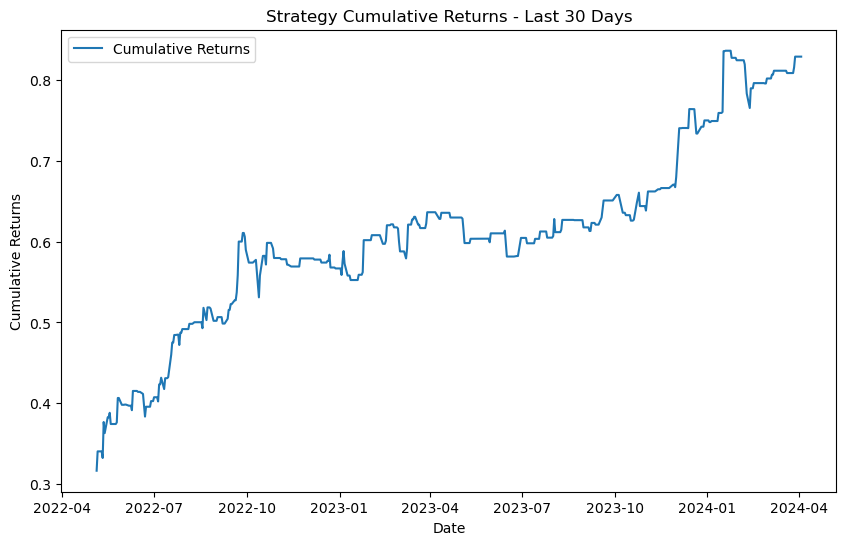

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'y_test' is your Series with predictions indexed by date
predictions_series = y_test  # This is already a Series, so no need to create a DataFrame

# Convert index to datetime if it's not already, to ensure alignment
predictions_series.index = pd.to_datetime(predictions_series.index)

# Ensure nifty_data's index is also datetime for proper alignment
nifty_data.index = pd.to_datetime(nifty_data.index)

# Extend the index of nifty_data to include the next day's data for the last date in predictions_series.index
last_date = predictions_series.index[-1] + pd.Timedelta(days=1)
nifty_data = pd.concat([nifty_data, pd.DataFrame(index=[last_date])])

# Align predictions with daily returns
# Here we multiply the predictions directly with the corresponding daily returns from nifty_data
strategy_returns = predictions_series * nifty_data.loc[predictions_series.index, 'daily_returns']
strategy_returns = strategy_returns.clip(lower=-1)

print(strategy_returns)
# Calculate cumulative returns
cumulative_returns = (1 + strategy_returns / 100).cumprod() - 1

# Plot only the last 30 days of data
limited_data = cumulative_returns.last('700d')  # You can adjust this period as needed

plt.figure(figsize=(10, 6))
plt.plot(limited_data.index, limited_data, label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Strategy Cumulative Returns - Last 30 Days')
plt.legend()
plt.show()


In [25]:
y_test.tail(50)

Date
2024-01-17   -1.0
2024-01-18    0.0
2024-01-19   -1.0
2024-01-23    0.0
2024-01-24    0.0
2024-01-25    1.0
2024-01-29    0.0
2024-01-30    1.0
2024-01-31    0.0
2024-02-01    0.0
2024-02-02    0.0
2024-02-05    0.0
2024-02-06    0.0
2024-02-07   -1.0
2024-02-08    1.0
2024-02-09   -1.0
2024-02-12    1.0
2024-02-13    1.0
2024-02-14    0.0
2024-02-15    0.0
2024-02-16    1.0
2024-02-20    0.0
2024-02-21    0.0
2024-02-22    0.0
2024-02-23    0.0
2024-02-26    0.0
2024-02-27   -1.0
2024-02-28    0.0
2024-02-29    1.0
2024-03-01    0.0
2024-03-04    0.0
2024-03-05    1.0
2024-03-06    0.0
2024-03-07   -1.0
2024-03-11    0.0
2024-03-12    0.0
2024-03-13    0.0
2024-03-14    0.0
2024-03-15    0.0
2024-03-18    0.0
2024-03-19    0.0
2024-03-20    1.0
2024-03-21    0.0
2024-03-22    0.0
2024-03-26    0.0
2024-03-27    1.0
2024-03-28    1.0
2024-04-01    0.0
2024-04-02    0.0
2024-04-03    0.0
Name: next_day_expected_returns, dtype: float64